## Assignment 1

##### Assignment 1: Regular Expression

In [49]:
import re
from dateutil import parser

# Read the input text file
with open("NLP_Exercise1_Input.txt", "r") as file:
    text = file.read()

# regular expressions
months = r'(January|February|March|April|May|June|July|August|September|October|November|December)'
monthsAbbrevations = r'(Jan|Feb|Aug|Sept|Oct|Nov|Dec).?'
day = r'(0?[1-9]|[12][0-9]|3[01])'
rank = r'(st|nd|rd)'
year = r'([12][0-9]{3})'
date_formats = [
    r'\s+'+ day+r'\s+' + months + r',?\s+'+ year +r'?',
    r'\s+'+ day+r'\s+'+ monthsAbbrevations +r'\s+'+ year,
    r'\s+'+ months +r'\s+'+ day +r',?\s+'+ year +r'?',
    r'\s+'+ year +r'\s+'+ months +r'\s+'+ day,
    r'\s+'+ day + rank +r'\s(of)\s'+ months +r'\s*'+ year +r'?',
    r'\s+'+day+r'/([01]?[0-9])/'+year,
]

month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',
    'Jan': 'January',
    'Feb': 'February',
    'Aug': 'August',
    'Sept': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December',
}

# List to store formatted dates
formatted_dates = []  

# function to format dates
def convert_to_dd_mm_yyyy(match):
    try:
        date = match.groups()
        # Add a default year if not provided
        day, month, year = None, None, "2023"
        for component in date:
            if component is not None:
                if component.isnumeric():
                    if len(component) == 4:
                        year = component
                    else:
                        if (day == None):
                            day = component
                        else:
                            month = month_dict[int(component)]
                elif component.isalpha() and len(component) > 2:
                    if component not in month_dict.keys():
                        month = component
                    else:
                        month = month_dict[component]
        # Format the date as 'dd/mm/yyyy'
        formatted_date = f'{day}-{month}-{year}'
        formatted_dates.append(formatted_date)
        return formatted_date
    except ValueError:
        date = match.group()
        formatted_dates.append(date)
        return date

# Process the text to replace date formats
for date_format in date_formats:
    text = re.sub(date_format, lambda x: convert_to_dd_mm_yyyy(x), text)
    
# Print dates captured
print("All captured dates formatted:")
for date in formatted_dates:
    print(date)

All captured dates formatted:
14-July-2023
17-August-2023
22-October-2008
5-August-2023
1-January-2023
22-July-2019
23-August-2023
1-August-2023
23-August-2023
5-August-2023


##### Assignment 2: Sentence Segmentation

##### Question a
Here puncuations marks are used as delimiters .!? etc \
.split() is used to bread using these puncuation marks \
it is easy to implement but cannot handle complex sentences 

In [50]:
# Read the input text file
with open("NLP_Exercise1_Input.txt", "r") as file:
    text = file.read()

# Using Puncuation delimiter
def punc_delimiter(text):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return sentences

data = punc_delimiter(text)
for i, sentence in enumerate(data, 1):
    print(f"Sentence {i}: {sentence}")



Sentence 1: Chandrayaan 3, India's third lunar exploration mission, was officially announced by ISRO Chairman, S.
Sentence 2: Somanath (https://www.isro.gov.in/Secretaryisro.html) on January 1, 2023 .
Sentence 3: The ambitious project aimed to build upon the successes of its predecessors, Chandrayaan 1 (launched on 22 Oct.
Sentence 4: 2008) and Chandrayaan 2 (launched on July 22, 2019).
Sentence 5: Chandrayaan-3 was launched on 14 July 2023, at 2:35 pm IST as scheduled, from Satish Dhawan Space Centre Second Launch Pad in Sriharikota, Andhra Pradesh, India.
Sentence 6: TransLunar Injection was done on 2023 August 1.
Sentence 7: The spacecraft entered lunar orbit on 5 Aug 2023, with an expected landing near the lunar South Pole on the 23rd of August.
Sentence 8: On 5/08/2023, ISRO performed a lunar-orbit insertion (LOI), successfully placing the Chandrayaan-3 spacecraft into orbit around the Moon.
Sentence 9: The LOI operation was carried out from the ISRO Telemetry, Tracking, and Comma

##### Question b
Used SpaCy and NLTK standard library for segmentation \
nltk for tokenization and spacy to load model for hadling complex sentences \
using library is easy with precise segemtation of sentences \
report: from normal segmentation using puncuation marks using spacy or nltk gives better segmentation 

In [51]:
# Using NLTK
import nltk
nltk.download('punkt') 
nltk_data = nltk.sent_tokenize(text)
for i, sentence in enumerate(nltk_data, start=1):
    print(f"Sentence {i}: {sentence}")

Sentence 1: Chandrayaan 3, India's third lunar exploration mission, was officially announced by ISRO Chairman, S. Somanath (https://www.isro.gov.in/Secretaryisro.html) on January 1, 2023 .
Sentence 2: The ambitious project aimed to build upon the successes of its predecessors, Chandrayaan 1 (launched on 22 Oct.  2008) and Chandrayaan 2 (launched on July 22, 2019).
Sentence 3: Chandrayaan-3 was launched on 14 July 2023, at 2:35 pm IST as scheduled, from Satish Dhawan Space Centre Second Launch Pad in Sriharikota, Andhra Pradesh, India.
Sentence 4: TransLunar Injection was done on 2023 August 1.
Sentence 5: The spacecraft entered lunar orbit on 5 Aug 2023, with an expected landing near the lunar South Pole on the 23rd of August.
Sentence 6: On 5/08/2023, ISRO performed a lunar-orbit insertion (LOI), successfully placing the Chandrayaan-3 spacecraft into orbit around the Moon.
Sentence 7: The LOI operation was carried out from the ISRO Telemetry, Tracking, and Command Network (ISTRAC) loc

[nltk_data] Downloading package punkt to
[nltk_data]     /home/vaibhavbnagrale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
# Using Spacy
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
spacy_data = [sent.text for sent in doc.sents]
print("Sentences segmented by SpaCy:")
for i, sentence in enumerate(spacy_data, start=1):
    print(f"Sentence {i}: {sentence}")

Sentences segmented by SpaCy:
Sentence 1: Chandrayaan 3, India's third lunar exploration mission, was officially announced by ISRO Chairman, S. Somanath (https://www.isro.gov.in/Secretaryisro.html) on January 1, 2023 .
Sentence 2: The ambitious project aimed to build upon the successes of its predecessors, Chandrayaan 1 (launched on 22 Oct.  2008) and Chandrayaan 2 (launched on July 22, 2019).
Sentence 3: Chandrayaan-3 was launched on 14 July 2023, at 2:35 pm IST as scheduled, from Satish Dhawan Space Centre Second Launch Pad in Sriharikota, Andhra Pradesh, India.
Sentence 4: TransLunar Injection was done on 2023 August 1.
Sentence 5: The spacecraft entered lunar orbit on 5 Aug 2023, with an expected landing near the lunar South Pole on the 23rd of August.
Sentence 6: On 5/08/2023, ISRO performed a lunar-orbit insertion (LOI), successfully placing the Chandrayaan-3 spacecraft into orbit around the Moon.
Sentence 7: The LOI operation was carried out from the ISRO Telemetry, Tracking, an

##### Assignment 3: Heap’s Law

##### Question a
From our observation and graph below we can say that with count of number of words increases TTR value decreases. \
number of words is inversely proportional to TTR

Running TTR after 2000 words: 0.4465
Running TTR after 4000 words: 0.3430
Running TTR after 6000 words: 0.3037
Running TTR after 8000 words: 0.2780
Running TTR after 10000 words: 0.2591
Running TTR after 12000 words: 0.2462
Running TTR after 14000 words: 0.2327
Running TTR after 16000 words: 0.2240
Running TTR after 18000 words: 0.2112
Running TTR after 20000 words: 0.2009
Running TTR after 22000 words: 0.1909
Running TTR after 24000 words: 0.1850
Running TTR after 26000 words: 0.1800
Running TTR after 28000 words: 0.1734
Running TTR after 30000 words: 0.1676
Running TTR after 32000 words: 0.1628
Running TTR after 34000 words: 0.1594
Running TTR after 36000 words: 0.1565
Running TTR after 38000 words: 0.1541
Running TTR after 40000 words: 0.1514
Running TTR after 42000 words: 0.1480
Running TTR after 44000 words: 0.1439
Running TTR after 46000 words: 0.1419
Running TTR after 48000 words: 0.1390
Running TTR after 50000 words: 0.1360
Running TTR after 52000 words: 0.1328
Running TTR afte

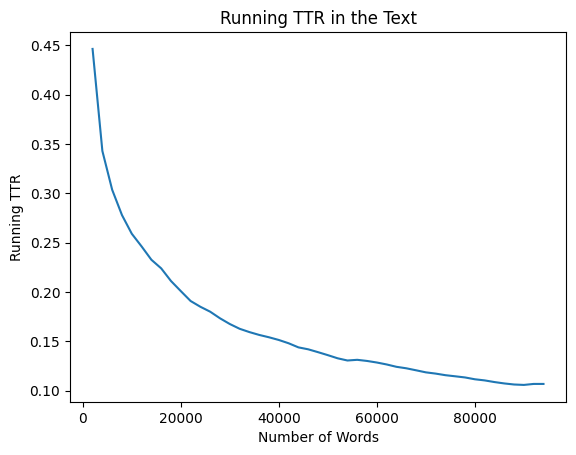

In [53]:
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Read the input text file
with open("The_Adventure_of_Tom_Sawyer.txt", "r") as file:
    text = file.read()

words = word_tokenize(text)

# variables for TTR
running_ttr = []
total_tokens = 0
unique_words = set()

# TTR of all 2000 words
for word in words:
    total_tokens += 1
    unique_words.add(word)
    
    if total_tokens % 2000 == 0:
        ttr = len(unique_words) / total_tokens
        running_ttr.append(ttr)

# Calculate TTR for the remaining tokens
final_ttr = len(unique_words) / total_tokens
running_ttr.append(final_ttr)

# print values
for i, ttr in enumerate(running_ttr, start=1):
    print(f"Running TTR after {i * 2000} words: {ttr:.4f}")

# Plot the running TTR graph
plt.plot(range(2000, (len(running_ttr) + 1) * 2000, 2000), running_ttr)
plt.xlabel("Number of Words")
plt.ylabel("Running TTR")
plt.title("Running TTR in the Text")
plt.show()



Question b

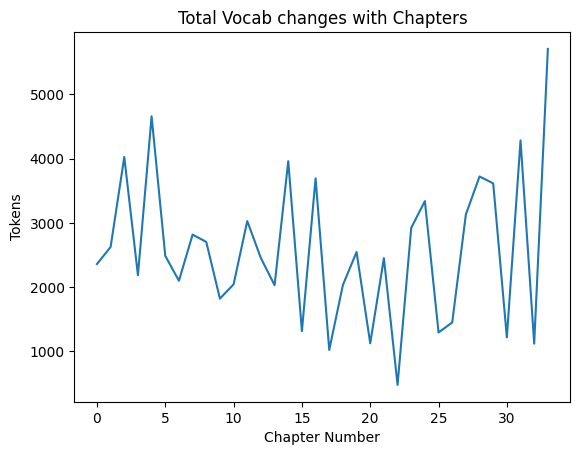

In [54]:
import matplotlib.pyplot as plt

beginChapters = []
chapter_regx = re.compile(r'\bCHAPTER\s+[I|V|X]+\s+\b')

for word in re.finditer(chapter_regx, text):
    beginChapters.append(word.start())

endChapters = beginChapters[1:] + [len(text)]

chapter_size = []

# total tokens for each chapter
for begin, end in zip(beginChapters, endChapters):
    chapter_text = text[begin:end]
    chapter_tokens = word_tokenize(chapter_text)
    chapter_size.append(len(chapter_tokens))

plt.plot(chapter_size)
plt.xlabel("Chapter Number")
plt.ylabel("Tokens")
plt.title("Total Vocab changes with Chapters")
plt.show()

Question c

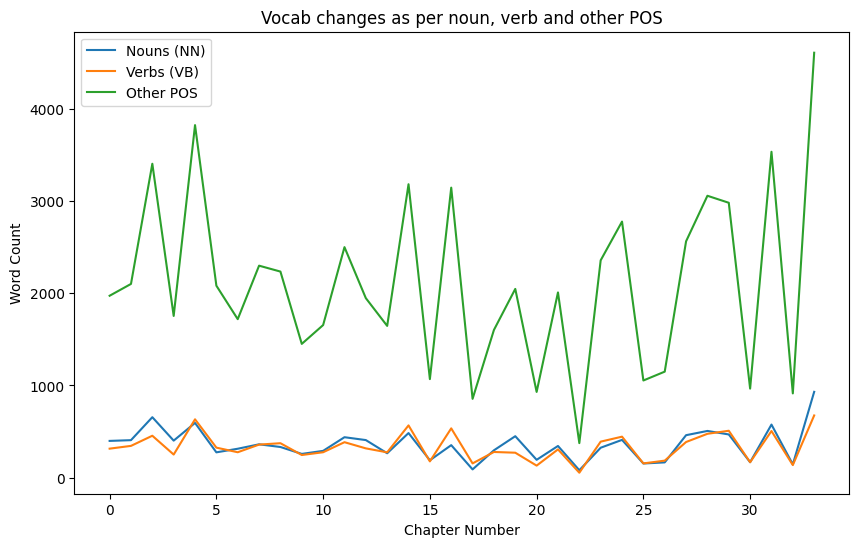

In [55]:
import spacy
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

# Read the input text file
with open("The_Adventure_of_Tom_Sawyer.txt", "r") as file:
    text = file.read()

# Lists to store vocabulary sizes at each chapter
noun_sizes = []
verb_sizes = []
other_sizes = []

# Iterate through chapters
for ch_begin, ch_end in zip(beginChapters, endChapters):
    ch_text = text[ch_begin:ch_end]
    ch_doc = [sent.text for sent in nlp(ch_text).sents]

    # counter per chapter
    noun_counter = 0
    verb_counter = 0
    other_pos_counter = 0
    
    for lines in ch_doc:
        line_doc = nlp(lines)
        for token in line_doc:
            if token.pos_ == 'NOUN':
                noun_counter += 1
            elif token.pos_ == 'VERB':
                verb_counter += 1
            else:
                other_pos_counter += 1

    noun_sizes.append(noun_counter)
    verb_sizes.append(verb_counter)
    other_sizes.append(other_pos_counter)

plt.figure(figsize=(10, 6))
plt.plot(noun_sizes, label='Nouns (NN)')
plt.plot(verb_sizes, label='Verbs (VB)')
plt.plot(other_sizes, label='Other POS')
plt.xlabel("Chapter Number")
plt.ylabel("Word Count")
plt.title("Vocab changes as per noun, verb and other POS")
plt.legend()
plt.show()
